#Partial Report

This notebook will present the initial progress achieved in the <strong>Braille Text Translator</strong> project, and also some partial results obtained for running this program with the following test image: 

<br>
<p>
 <img src='https://raw.githubusercontent.com/lucasturci/BrailleTextTranslator/master/images/1.png' width='800px'/> </p>

For the first part, let's include some useful libraries and define utility functions: 

In [0]:
import imageio
import numpy as np
import matplotlib.pyplot as plt

# normalizes image pixels between 0 and 255
def normalize(img):
	imin = np.min(img)
	imax = np.max(img)

	return (((img - imin)/(imax - imin)) * 255).astype(np.float)

# Prints image with minimum value equal to 0 and maximum to 255
def printImage(img):
  plt.figure(figsize=(16,8)) 
  plt.imshow(mat, cmap="gray", vmin=0, vmax=255)
  
# Prints image with matplotlib defaults  
def printImage2(img):
  plt.figure(figsize=(16,8)) 
  plt.imshow(mat, cmap="gray")  

Next, let's define a filter which we are going to use to reduce noises and also highlight the pixels which are most likely to belong to a braille circle. The filter defined applies the difference between it's original value and the median of it's neighbourhood, so that the background will most likely become black and the shadows of the braille circles will most likely become white 

In [0]:
# Median difference filter, highlights the shadow pixels
def filter(I, n):
  m = n//2
  J = np.empty(I.shape, dtype=np.float)
  N, M = I.shape
  I = np.pad(I, ((m, m), (m, m)), 'symmetric')
  
  for i in range(N):
    for j in range(M):
      sub = I[i+m:(i+m+n), j+m:(j+m+n)]
      med = np.median(np.ravel(sub)) # gets median
      J[i, j] = abs(I[i+m, j+m] - med) # applies the difference
  return J

We will also use a mean filter, to smooth the image after filtering with median difference, so that remaining noise may be ignored in thresholding step, while highlited circles may be still preserved 

In [0]:
# applies mean filter to image I
def MeanFilter(I, n):
	m = n//2
	J = np.empty(I.shape, dtype=np.float) # the answer
	N, M = I.shape
	I = np.pad(I, ((m, m), (m, m)), 'symmetric')
	for	i in range(N):
		for j in range(M):
			# copies the matrix to sub
			sub = I[i+m:(i+m+n), j+m:(j+m+n)]
			J[i, j] = np.mean(np.ravel(sub)) # get mean of the linearized list
	return J

This part of the code deals with the following steps:


1.   Read filename
2.   Read image to matrix
3.   Transform RGB image to gray scale, using YCbCr inear conversion
4.   Normalize the input matrix
5.   Apply median difference filter
6.   Transform to binary matrix with thresholding


1.png


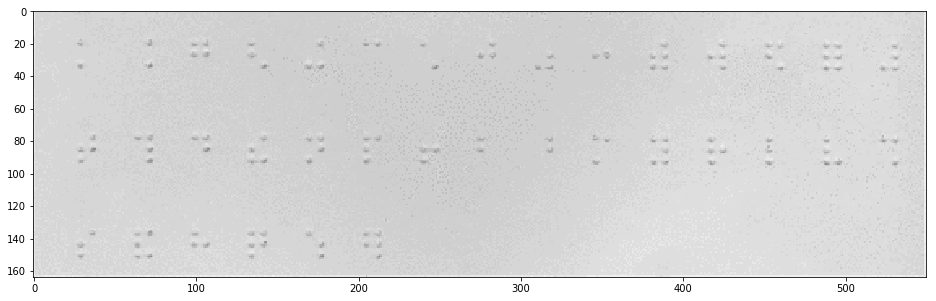

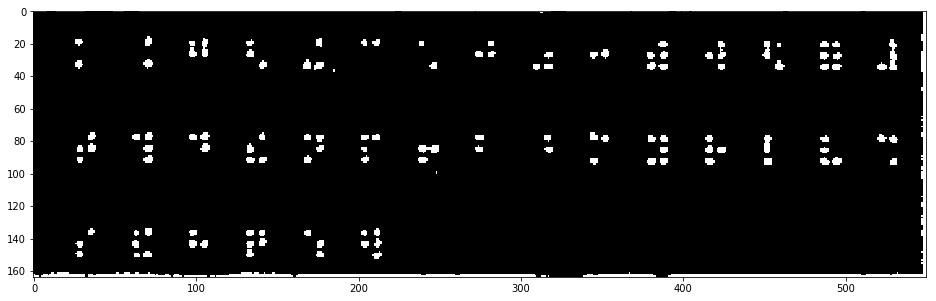

In [13]:
filename = str(input()).rstrip() # filename of the input image
image = imageio.imread(filename)
matrix = np.array(image, copy=True, dtype=np.float)

N, M, _ = matrix.shape

# Transform RGB to gray scale
for i in range(N):
  for j in range(M):
    matrix[i, j, 0] = matrix[i, j, 0] * 0.2989 + matrix[i, j, 1] * 0.5870 + matrix[i, j, 2] * 0.1140
    
matrix = matrix[:, :, 0:1].squeeze()

# Plot original image
mat = matrix.astype(np.uint8)
printImage(mat)

matrix = normalize(matrix)
matrix = filter(matrix, 21) # Applies filter to normalized matrix
matrix = normalize(matrix)

# Smooth image using mean filter, to reduce noise
matrix = MeanFilter(matrix, 3)

# Thresholding step, 30 is arbitrary and independent of input image gray scale
for i in range(N):
  for j in range(M):
    matrix[i, j] = 0 if matrix[i, j] < 30 else 1


# Plot segmented image
mat = matrix.astype(np.uint8)
printImage2(mat)

For the rest of the functionality of the program, the patterns of dots must be recognized and transformed into letters. This part will be implemented in the way described in the README of the github repository.